In [251]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import yfinance as yf

In [233]:
# SPDR S&P 500 ETF Trust
SPY = yf.download(tickers=['SPY'], start='2015-01-01', end='2025-01-01', auto_adjust=True)
SPY.tail()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2024-12-24,597.729553,597.769355,591.934154,592.520677,33160100
2024-12-26,597.769348,598.902533,594.528696,595.940247,41219100
2024-12-27,591.476868,594.230439,587.252104,593.991813,64969300
2024-12-30,584.727173,588.226291,580.939799,584.399176,56578800
2024-12-31,582.599915,587.132835,580.949738,586.407129,57052700


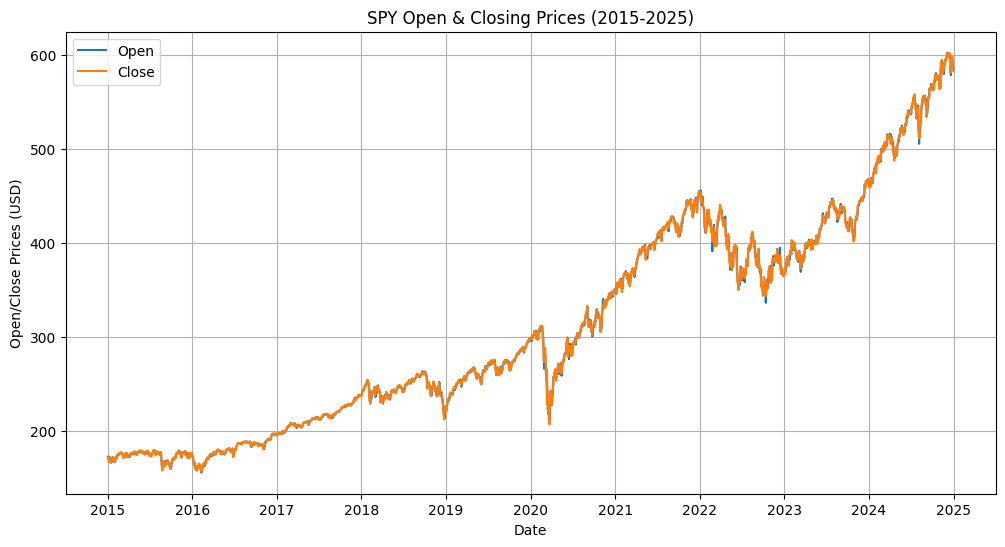

In [234]:
plt.figure(figsize=(12,6))
plt.plot(SPY.index, SPY['Open'], label='Open')
plt.plot(SPY.index, SPY['Close'], label='Close')
plt.title('SPY Open & Closing Prices (2015-2025)')
plt.xlabel('Date')
plt.ylabel('Open/Close Prices (USD)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
pass

In [235]:
SPY['Daily Return %'] = SPY['Close'].pct_change()
SPY['Daily Return $'] = SPY['Close'] - SPY['Open']

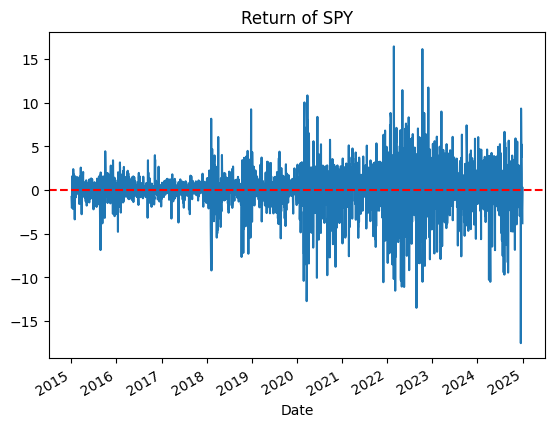

In [236]:
SPY['Daily Return $'].plot()
plt.title("Return of SPY")
plt.axhline(color='r', linestyle='--')
plt.show()

In [237]:
# Largest Daily Gain on 2024-12-18
SPY.loc[SPY['Daily Return $'].idxmin(), ['Close', 'Open']].to_dict(), SPY['Daily Return $'].idxmin()

({('Close', 'SPY'): 580.8438110351562, ('Open', 'SPY'): 598.3796413211339},
 Timestamp('2024-12-18 00:00:00'))

In [238]:
SPY['Cumulative Returns'] = SPY['Daily Return $'].cumsum()
SPY.sample(n=1)

Price,Close,High,Low,Open,Volume,Daily Return %,Daily Return $,Cumulative Returns
Ticker,SPY,SPY,SPY,SPY,SPY,,,
Date,,,,,,,,
2015-01-23,171.183868,172.127609,171.050239,171.868697,117516800,-0.005483,-0.684829,-4.050532


In [239]:
SPY['SMA_20'] = SPY['Close'].rolling(20).mean()
SPY['SMA_50'] = SPY['Close'].rolling(50).mean()

SPY['Signal'] = 0
SPY.loc[SPY['SMA_20'] > SPY['SMA_50'], 'Signal'] = 1  # Buy signal
SPY.loc[SPY['SMA_20'] < SPY['SMA_50'], 'Signal'] = -1 # Sell signal

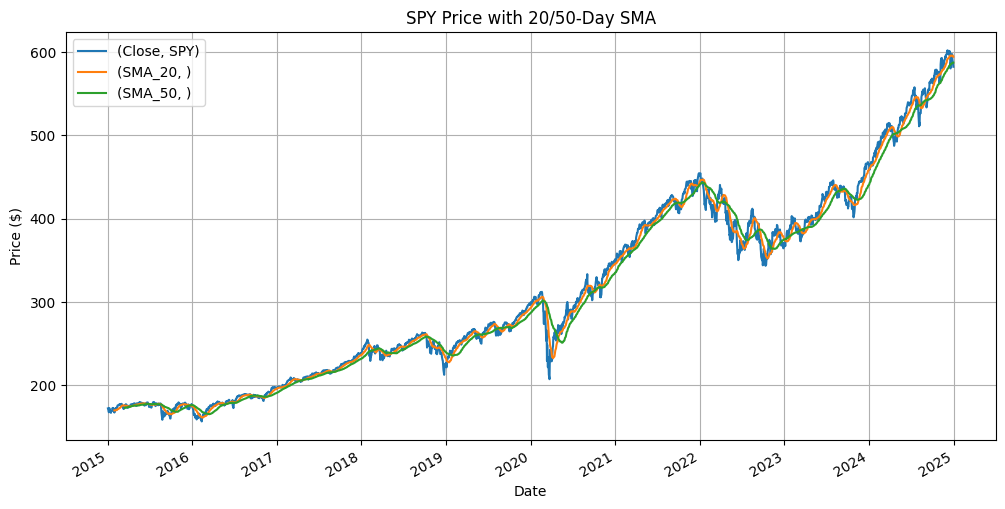

In [240]:
SPY[['Close', 'SMA_20', 'SMA_50']].plot(
    figsize=(12, 6),
    title="SPY Price with 20/50-Day SMA"
)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [254]:
# Linear Regression Analysis

In [241]:
SPY['Target'] = SPY['Daily Return %'].shift(-1)

In [242]:
SPY.dropna(inplace=True)

In [243]:
X = SPY[['Open', 'High', 'Low', 'Close', 'Volume']]
y = SPY['Target']

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [245]:
lm = LinearRegression()
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [247]:
y_pred = lm.predict(X_test)

In [252]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.8f}")

R²: 0.0218
MSE: 0.00012783


**TAKEAWAYS**
* _2.18% of the variation of next day returns is explained by the model_
* _Daily stock returns are difficult to project with features such as 'Close' and 'Volume'- no better than random guessing_
* _Underfitting- the model is too simple to capture randomness and complexity of market_

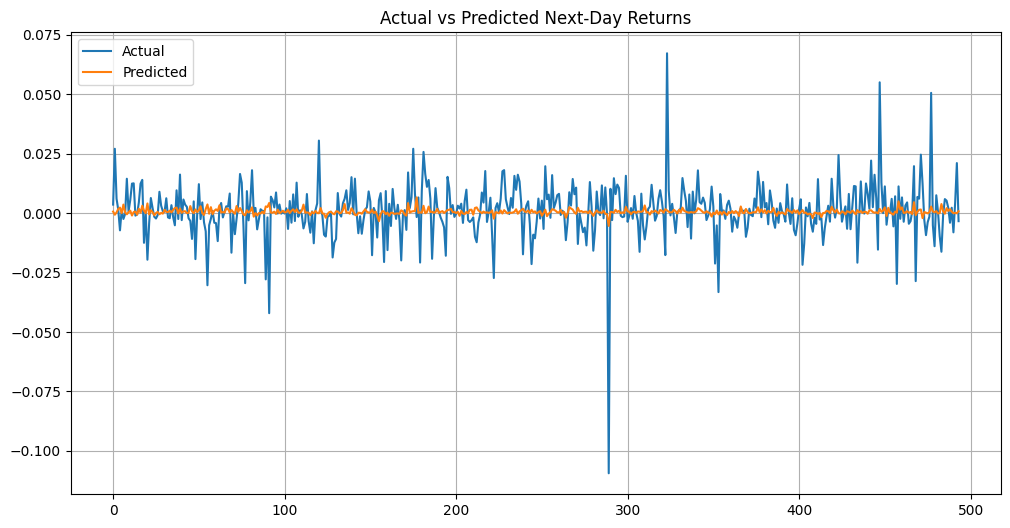

In [255]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted Next-Day Returns")
plt.legend()
plt.grid(True)
plt.show()